# Fashion MNIST Classification using CNN
## Complete Project with Evaluation Metrics

This notebook demonstrates:
1. Building a CNN architecture for Fashion MNIST
2. Training the model
3. Generating evaluation metrics:
   - Accuracy Plot
   - Loss Plot
   - Confusion Matrix
   - Classification Report

## 1. Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

## 2. Load and Explore the Dataset

In [6]:
# Fashion MNIST class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# # Load the dataset
# (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# print(f"Training set shape: {X_train.shape}")
# print(f"Training labels shape: {y_train.shape}")
# print(f"Test set shape: {X_test.shape}")
# print(f"Test labels shape: {y_test.shape}")
# print(f"\nNumber of classes: {len(class_names)}")
# print(f"Classes: {class_names}")


# Load training data
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

# Separate features and labels
y_train = train_df['label'].values
X_train = train_df.drop('label', axis=1).values

y_test = test_df['label'].values
X_test = test_df.drop('label', axis=1).values

# Reshape to image format (28x28)
X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (60000, 28, 28)
Test set: (10000, 28, 28)


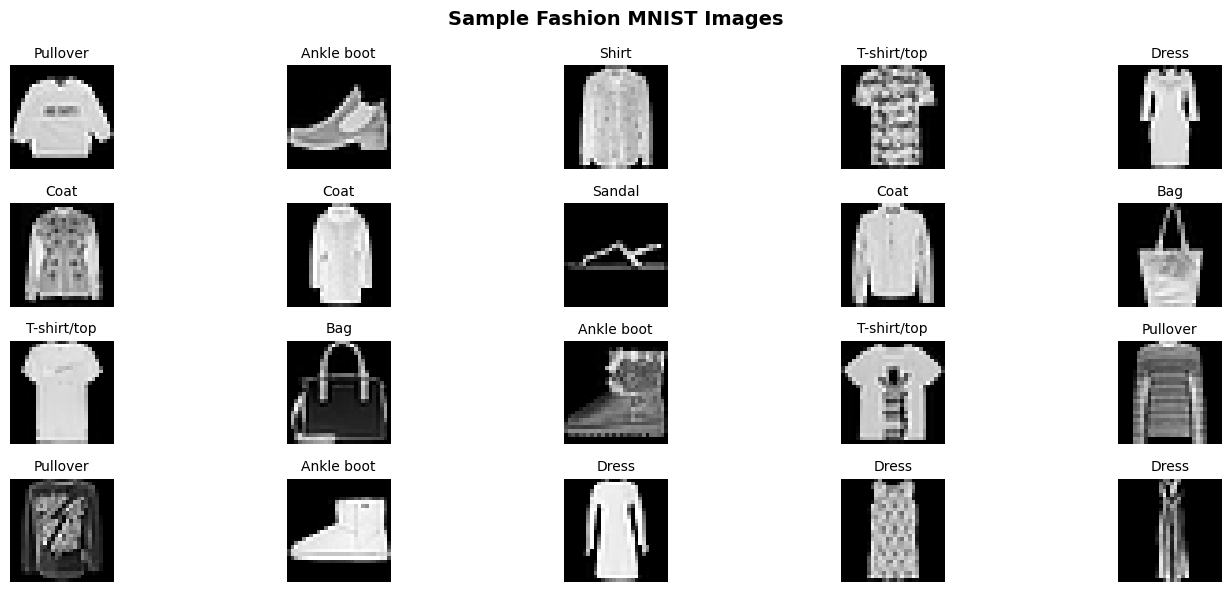

In [7]:
# Visualize sample images
plt.figure(figsize=(15, 6))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]], fontsize=10)
    plt.axis('off')
plt.suptitle('Sample Fashion MNIST Images', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 3. Data Preprocessing

In [8]:
# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape for CNN (add channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(f"Preprocessed training shape: {X_train.shape}")
print(f"Preprocessed test shape: {X_test.shape}")
print(f"One-hot encoded labels shape: {y_train_cat.shape}")
print(f"\nSample pixel value range: [{X_train.min():.2f}, {X_train.max():.2f}]")

Preprocessed training shape: (60000, 28, 28, 1)
Preprocessed test shape: (10000, 28, 28, 1)
One-hot encoded labels shape: (60000, 10)

Sample pixel value range: [0.00, 1.00]


## 4. Build CNN Architecture

In [9]:
def create_cnn_model():
    """Create CNN architecture for Fashion MNIST classification"""
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), 
                     padding='same', name='conv1'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), name='pool1'),
        layers.Dropout(0.25),
        
        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), name='pool2'),
        layers.Dropout(0.25),
        
        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), name='pool3'),
        layers.Dropout(0.4),
        
        # Flatten and Dense Layers
        layers.Flatten(),
        layers.Dense(256, activation='relu', name='dense1'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu', name='dense2'),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax', name='output')
    ])
    
    return model

# Create model
model = create_cnn_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 423,946 (1.62 MB)

 Trainable params: 422,986 (1.61 MB)

 Non-trainable params: 960 (3.75 KB)

## 5. Compile the Model

In [10]:
# Compile model
model.compile(
    optimizer='adam',                  # Adam optimizer adjusts learning automatically
    loss='categorical_crossentropy',   # Used for multi-class classification (like 10 classes)
    metrics=['accuracy']               # Shows accuracy during training
)

# Define callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',        # Monitor validation loss
    patience=5,                # Wait 5 epochs before stopping
    restore_best_weights=True, # Restore best model weights
    verbose=1                  # Show message when stopping
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   # Monitor validation loss
    factor=0.5,           # Reduce learning rate by 50%
    patience=3,           # Wait 3 epochs before reducing
    min_lr=0.00001,       # Minimum learning rate limit
    verbose=1             # Show message when LR is reduced
)

print("Model compiled successfully!")

Model compiled successfully!


## 6. Train the Model

In [11]:
# Train model
history = model.fit(
    X_train, y_train_cat,
    batch_size=128,
    epochs=5,
    validation_data=(X_test, y_test_cat),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 92ms/step - accuracy: 0.7403 - loss: 0.7193 - val_accuracy: 0.6978 - val_loss: 0.8630 - learning_rate: 0.0010
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 127s 188ms/step - accuracy: 0.8412 - loss: 0.4331 - val_accuracy: 0.8876 - val_loss: 0.3009 - learning_rate: 0.0010
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 144ms/step - accuracy: 0.8657 - loss: 0.3717 - val_accuracy: 0.8995 - val_loss: 0.2669 - learning_rate: 0.0010
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 70ms/step - accuracy: 0.8783 - loss: 0.3329 - val_accuracy: 0.9060 - val_loss: 0.2478 - learning_rate: 0.0010
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.8838 - loss: 0.3178 - val_accuracy: 0.9025 - val_loss: 0.2448 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.


## 7. Evaluate the Model

In [12]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\n{'='*60}")
print(f"TEST SET EVALUATION")
print(f"{'='*60}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"{'='*60}")


TEST SET EVALUATION
Test Loss: 0.2448
Test Accuracy: 0.9025 (90.25%)


## 8. Metric 1: Accuracy Plot

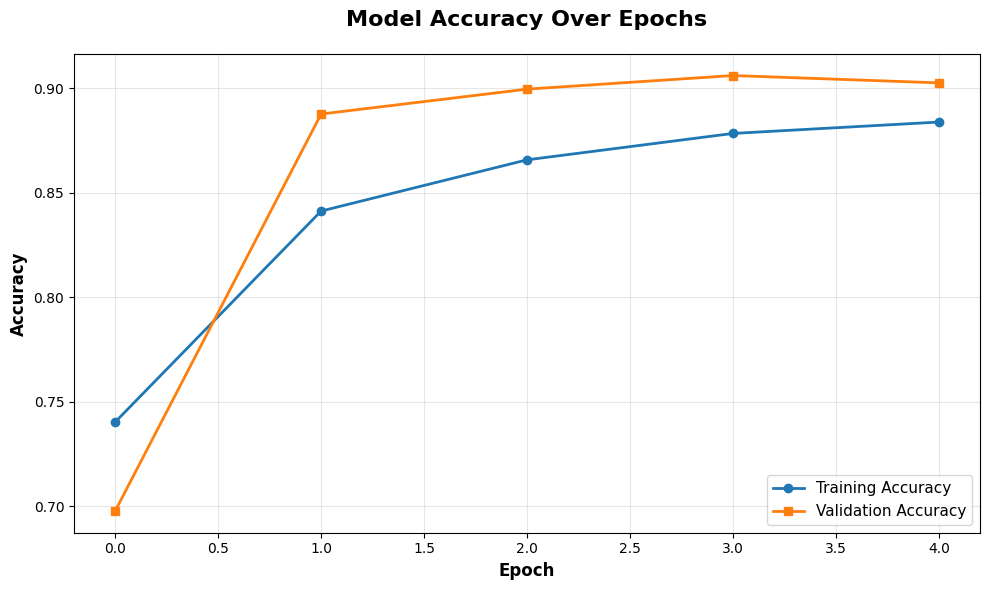

In [13]:
# Plot training & validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2, marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, marker='s')
plt.title('Model Accuracy Over Epochs', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Metric 2: Loss Plot

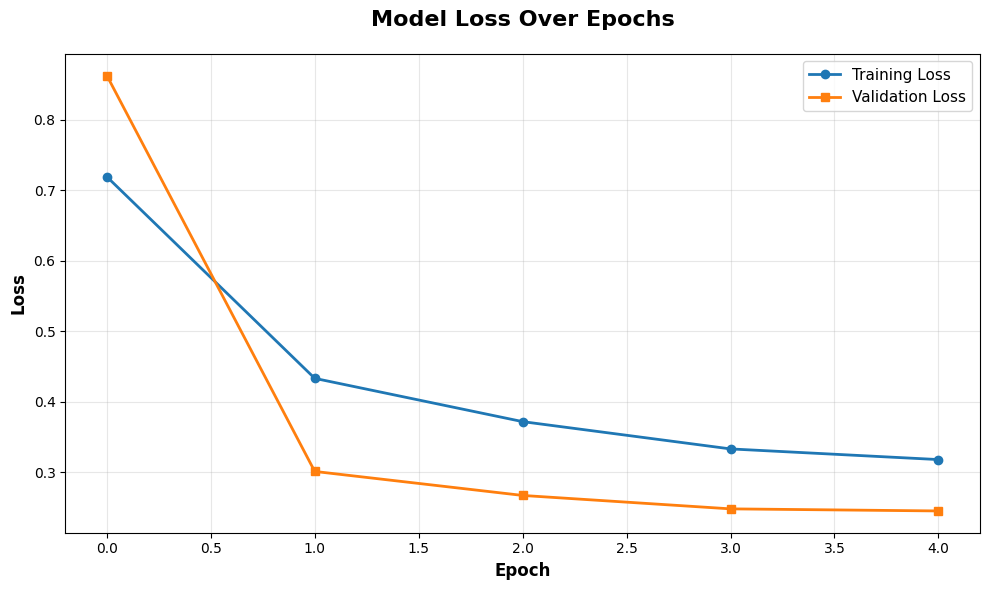

In [14]:
# Plot training & validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2, marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2, marker='s')
plt.title('Model Loss Over Epochs', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 10. Generate Predictions

In [15]:
# Generate predictions on test set
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

print(f"Predictions generated for {len(y_pred)} test samples")
print(f"Sample predictions: {y_pred[:10]}")
print(f"Actual labels: {y_test[:10]}")

Predictions generated for 10000 test samples
Sample predictions: [0 1 2 2 3 6 8 6 5 0]
Actual labels: [0 1 2 2 3 2 8 6 5 0]


## 11. Metric 3: Confusion Matrix

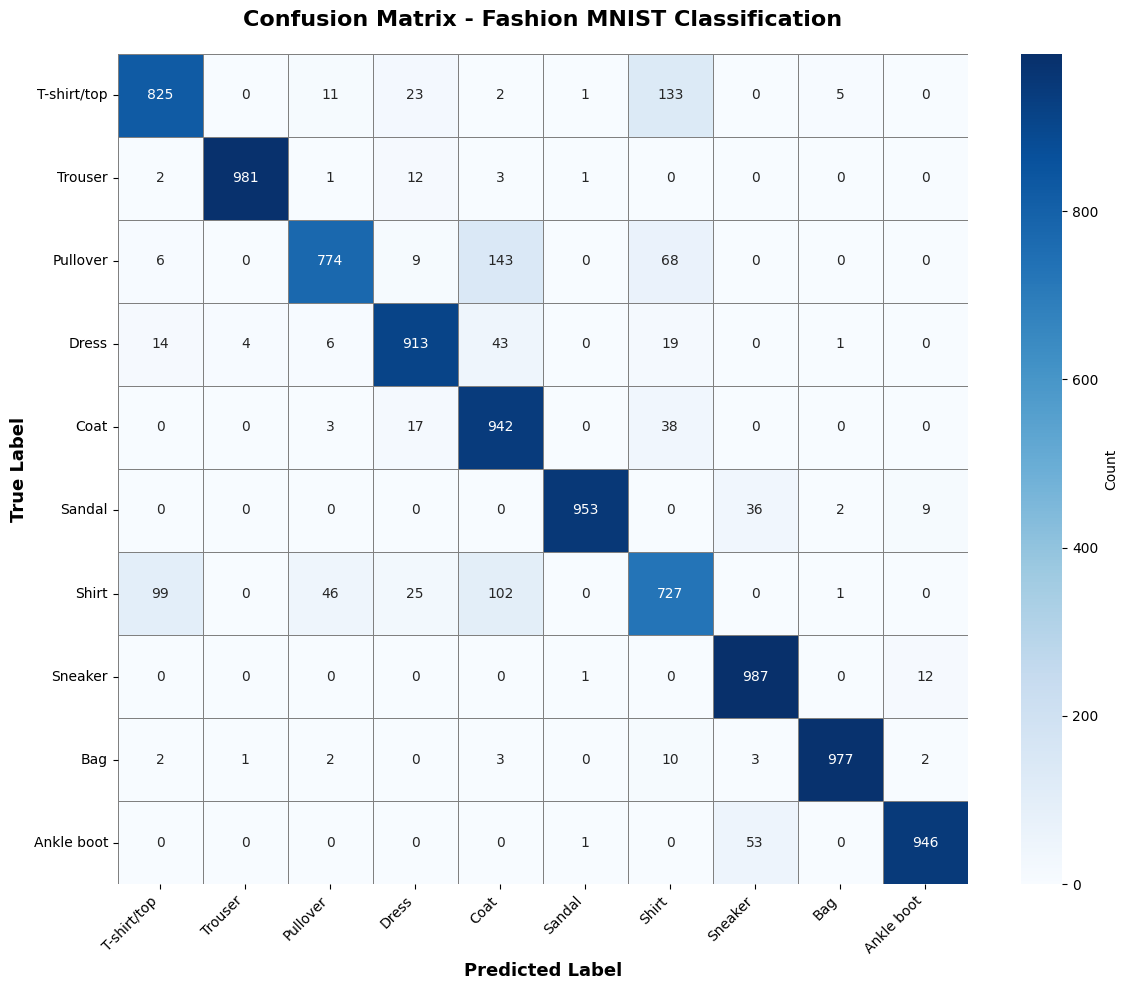


Per-Class Accuracy:
T-shirt/top    : 82.50%
Trouser        : 98.10%
Pullover       : 77.40%
Dress          : 91.30%
Coat           : 94.20%
Sandal         : 95.30%
Shirt          : 72.70%
Sneaker        : 98.70%
Bag            : 97.70%
Ankle boot     : 94.60%


In [16]:
# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'},
            linewidths=0.5, linecolor='gray')
plt.title('Confusion Matrix - Fashion MNIST Classification', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=13, fontweight='bold')
plt.ylabel('True Label', fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate per-class accuracy
print("\nPer-Class Accuracy:")
print("="*50)
for i in range(10):
    class_accuracy = cm[i, i] / cm[i].sum() * 100
    print(f"{class_names[i]:15s}: {class_accuracy:.2f}%")

## 12. Metric 4: Classification Report

In [17]:
# Generate classification report
report = classification_report(y_test, y_pred, 
                               target_names=class_names,
                               digits=4)

print("="*70)
print("CLASSIFICATION REPORT - Fashion MNIST")
print("="*70)
print(report)
print("="*70)

CLASSIFICATION REPORT - Fashion MNIST
              precision    recall  f1-score   support

 T-shirt/top     0.8703    0.8250    0.8470      1000
     Trouser     0.9949    0.9810    0.9879      1000
    Pullover     0.9181    0.7740    0.8399      1000
       Dress     0.9139    0.9130    0.9135      1000
        Coat     0.7609    0.9420    0.8418      1000
      Sandal     0.9958    0.9530    0.9739      1000
       Shirt     0.7307    0.7270    0.7288      1000
     Sneaker     0.9147    0.9870    0.9495      1000
         Bag     0.9909    0.9770    0.9839      1000
  Ankle boot     0.9763    0.9460    0.9609      1000

    accuracy                         0.9025     10000
   macro avg     0.9066    0.9025    0.9027     10000
weighted avg     0.9066    0.9025    0.9027     10000



## 13. Visualize Sample Predictions

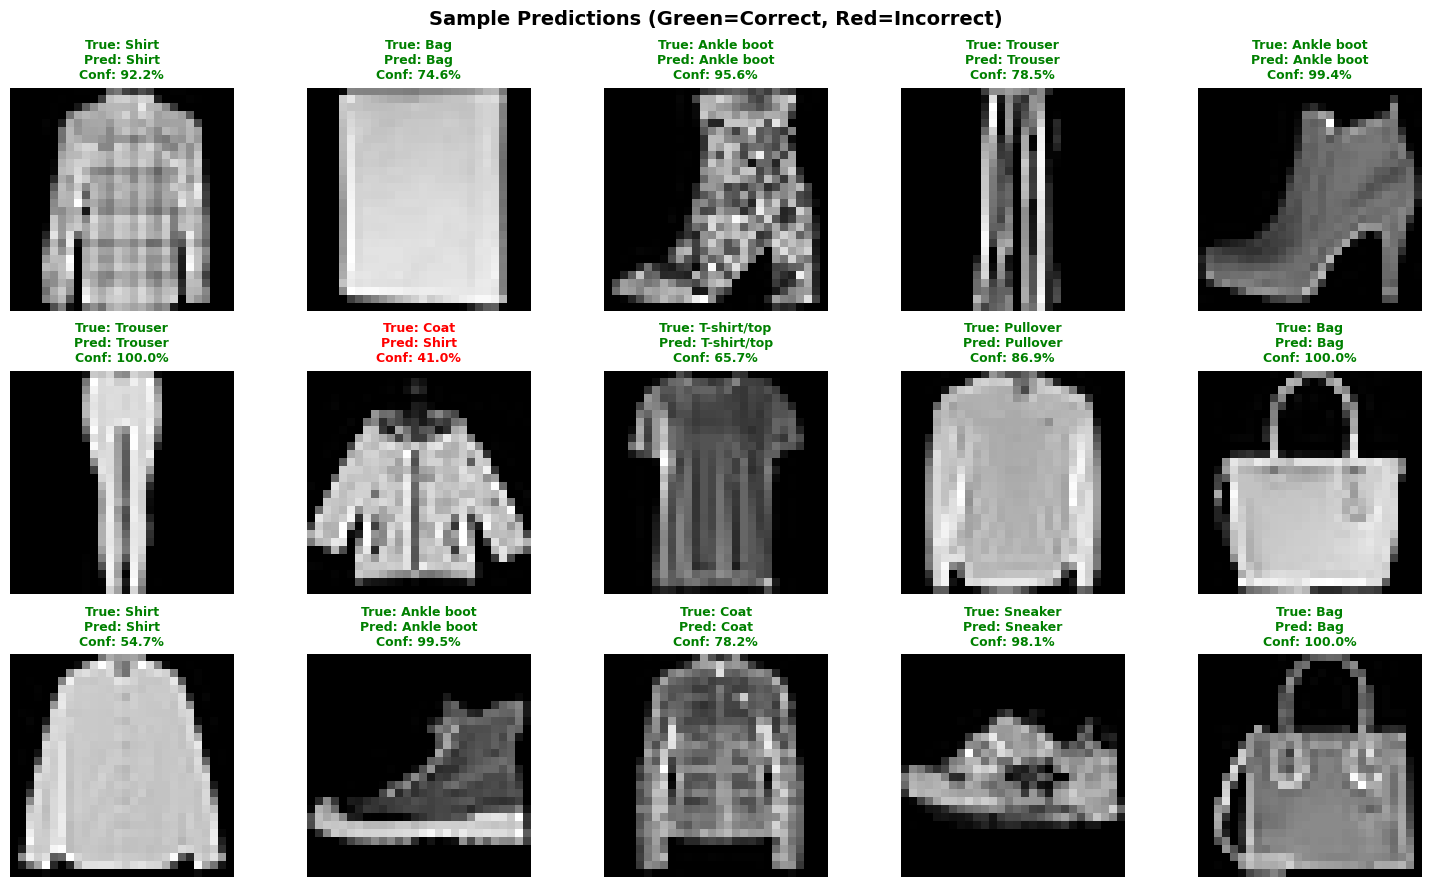

In [18]:
# Visualize sample predictions
num_samples = 15
indices = np.random.choice(len(X_test), num_samples, replace=False)

fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.ravel()

for i, idx in enumerate(indices):
    pred = model.predict(X_test[idx:idx+1], verbose=0)
    pred_class = np.argmax(pred)
    true_class = y_test[idx]
    confidence = np.max(pred) * 100
    
    axes[i].imshow(X_test[idx].reshape(28, 28), cmap='gray')
    axes[i].axis('off')
    
    color = 'green' if pred_class == true_class else 'red'
    axes[i].set_title(f'True: {class_names[true_class]}\n'
                     f'Pred: {class_names[pred_class]}\n'
                     f'Conf: {confidence:.1f}%',
                     fontsize=9, color=color, fontweight='bold')

plt.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)', 
             fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

## 14. Analyze Misclassifications

Total misclassified samples: 975 out of 10000
Misclassification rate: 9.75%


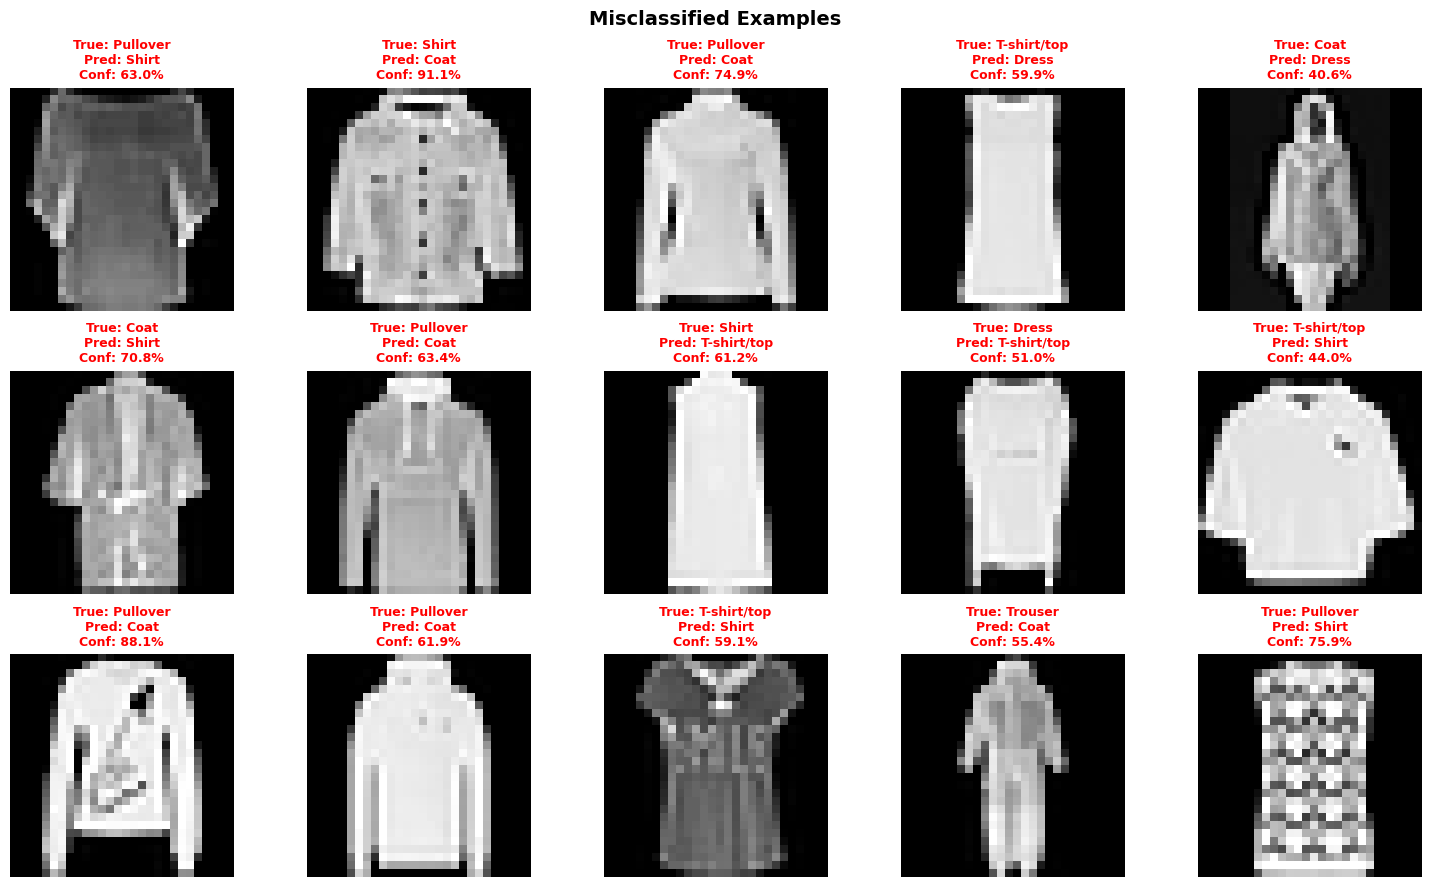

In [19]:
# Find misclassified samples
misclassified_idx = np.where(y_pred != y_test)[0]
print(f"Total misclassified samples: {len(misclassified_idx)} out of {len(y_test)}")
print(f"Misclassification rate: {len(misclassified_idx)/len(y_test)*100:.2f}%")

# Show some misclassified examples
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.ravel()

for i, idx in enumerate(misclassified_idx[:15]):
    axes[i].imshow(X_test[idx].reshape(28, 28), cmap='gray')
    axes[i].axis('off')
    
    pred_prob = y_pred_probs[idx]
    axes[i].set_title(f'True: {class_names[y_test[idx]]}\n'
                     f'Pred: {class_names[y_pred[idx]]}\n'
                     f'Conf: {np.max(pred_prob)*100:.1f}%',
                     fontsize=9, color='red', fontweight='bold')

plt.suptitle('Misclassified Examples', fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

## 15. Save the Model

In [20]:
# Save the trained model
model.save('fashion_mnist_cnn_model.keras')
print("Model saved successfully as 'fashion_mnist_cnn_model.keras'")

# To load the model later:
# loaded_model = keras.models.load_model('fashion_mnist_cnn_model.keras')

Model saved successfully as 'fashion_mnist_cnn_model.keras'


## 16. Summary of Results

In [22]:
print("="*70)
print("PROJECT SUMMARY")
print("="*70)
print(f"\nDataset: Fashion MNIST")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Number of classes: {len(class_names)}")
#print(f"\nModel Architecture: CNN with 3 Conv blocks + 2 Dense layers")
print(f"Total parameters: {model.count_params():,}")
print(f"\nFinal Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Final Test Loss: {test_loss:.4f}")
print(f"\nTotal epochs trained: {len(history.history['accuracy'])}")
print(f"Best validation accuracy: {max(history.history['val_accuracy'])*100:.2f}%")
print(f"\nMisclassified samples: {len(misclassified_idx)} / {len(y_test)}")
print("="*70)

PROJECT SUMMARY

Dataset: Fashion MNIST
Training samples: 60000
Test samples: 10000
Number of classes: 10
Total parameters: 423,946

Final Test Accuracy: 90.25%
Final Test Loss: 0.2448

Total epochs trained: 5
Best validation accuracy: 90.60%

Misclassified samples: 975 / 10000
